In [1]:
import seaborn as sns
from runco import config, sc
import datetime
import matplotlib.pyplot as plt
import numpy
import pandas

sns.set_context('notebook')
sns.set_style('whitegrid')
%matplotlib notebook

In [2]:
results={'uB_BeamData_BEAM_BNB_THCURR/current':{},
       'uB_BeamData_BEAM_BNB_TOR875/protons':{},
       'uB_BeamData_BEAM_BNB_REQMBE/req_rate':{},
       'uB_BeamData_BEAM_BNB_MBRATE/p_per_hour':{},
       'uB_BeamData_BEAM_BNB_THCURR/curr_beamon':{},
       'uB_BeamData_BEAM_BNB_BNBHT4/temperature_degF':{},
       'uB_BeamData_BEAM_BNB_BTJT2/temperature':{},
       'uB_BeamData_BEAM_NuMI_TORTGT/protons':{},
       'uB_BeamData_BEAM_NuMI_NSLINA/current':{}
        }
last_n_days=14
plus_hours=12

In [3]:
conf = config.Config()
slowcon = sc.ConfiguredSlowControls(conf.data['slowcontrols'])
for key in results:
    results[key]['ch'] = slowcon.channel_id_by_name[key]

In [4]:
form = lambda x : x.strftime("%Y-%m-%d %H:%M:%S")

In [5]:
now = datetime.datetime.now()
one_week_ago = now - datetime.timedelta(days=last_n_days, hours=plus_hours)
for key in results:
    slowcon.query_timebinned_data(results[key]['ch'],1, form(one_week_ago), form(now))
    result = slowcon.cur.fetchall()
    results[key]['time'] = [datetime.datetime.fromtimestamp(i[1]) for i in result]
    results[key]['value'] = [i[2] for i in result]

<IPython.core.display.Javascript object>


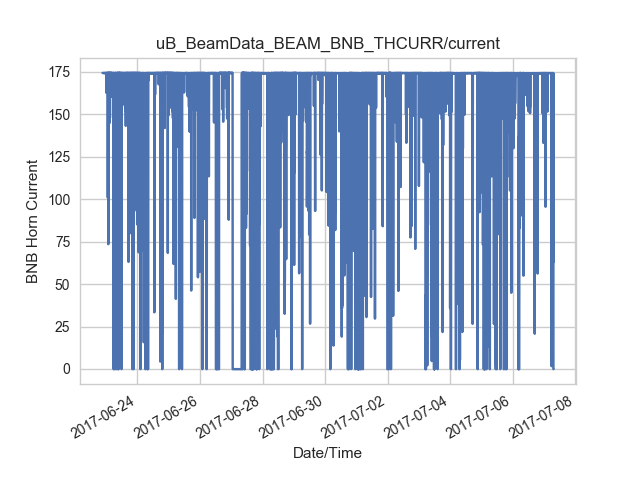

In [6]:
key = 'uB_BeamData_BEAM_BNB_THCURR/current'
ax = plt.figure()
plt.plot(results[key]['time'],results[key]['value'])
plt.xlabel('Date/Time')
plt.ylabel('BNB Horn Current')
plt.title(key)
ax.autofmt_xdate()

<IPython.core.display.Javascript object>


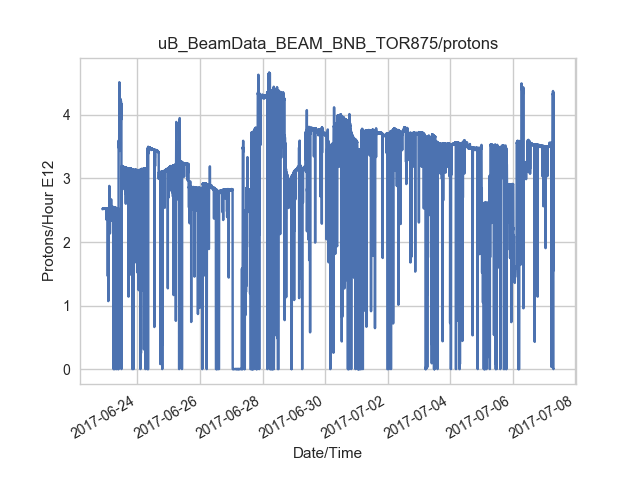

In [7]:
key = 'uB_BeamData_BEAM_BNB_TOR875/protons'
ax = plt.figure()
plt.plot(results[key]['time'],results[key]['value'])
plt.xlabel('Date/Time')
plt.ylabel('Protons/Hour E12')
plt.title(key)
ax.autofmt_xdate()

<IPython.core.display.Javascript object>


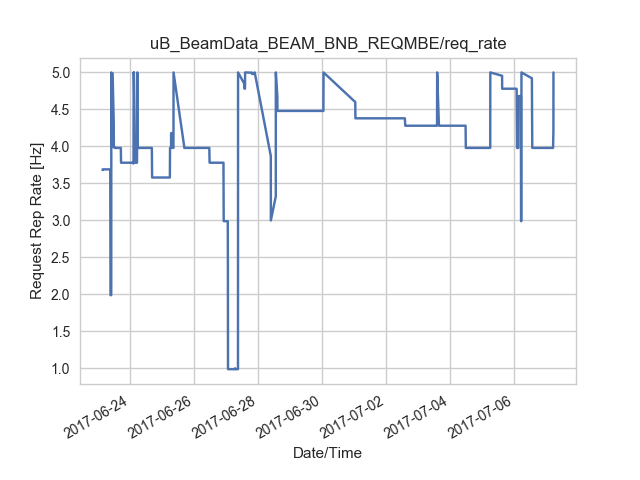

In [8]:
key = 'uB_BeamData_BEAM_BNB_REQMBE/req_rate'
ax = plt.figure()
plt.plot(results[key]['time'],results[key]['value'])
plt.xlabel('Date/Time')
plt.ylabel('Request Rep Rate [Hz]')
plt.title(key)
ax.autofmt_xdate()

<IPython.core.display.Javascript object>


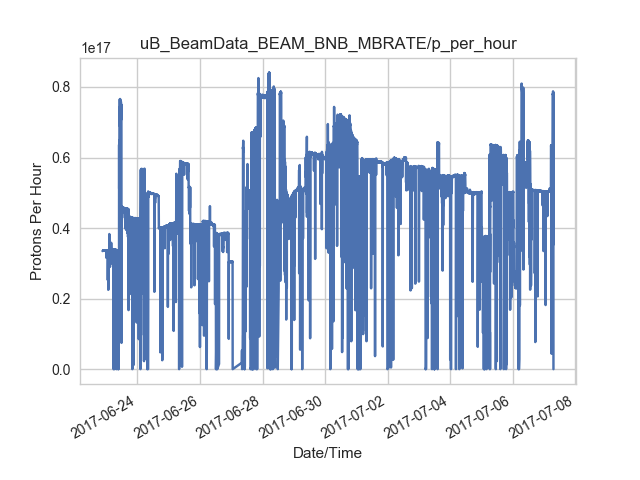

In [9]:
key = 'uB_BeamData_BEAM_BNB_MBRATE/p_per_hour'
ax = plt.figure()
plt.plot(results[key]['time'],results[key]['value'])
plt.xlabel('Date/Time')
plt.ylabel('Protons Per Hour')
plt.title(key)
ax.autofmt_xdate()

<IPython.core.display.Javascript object>


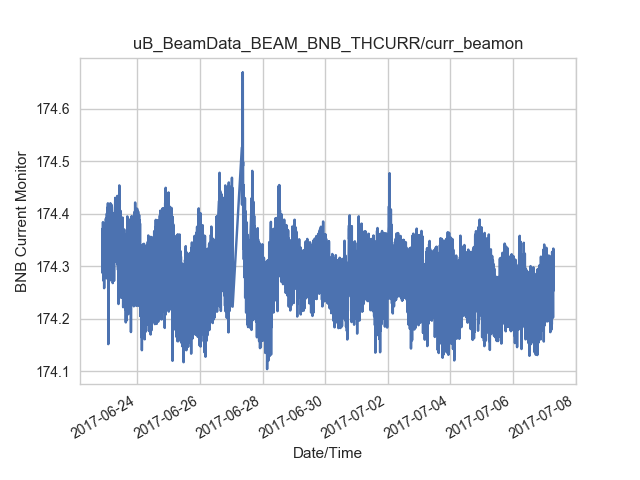

In [10]:
key = 'uB_BeamData_BEAM_BNB_THCURR/curr_beamon'
ax = plt.figure()
plt.plot(results[key]['time'],results[key]['value'])
plt.xlabel('Date/Time')
plt.ylabel('BNB Current Monitor')
plt.title(key)
ax.autofmt_xdate()

<IPython.core.display.Javascript object>


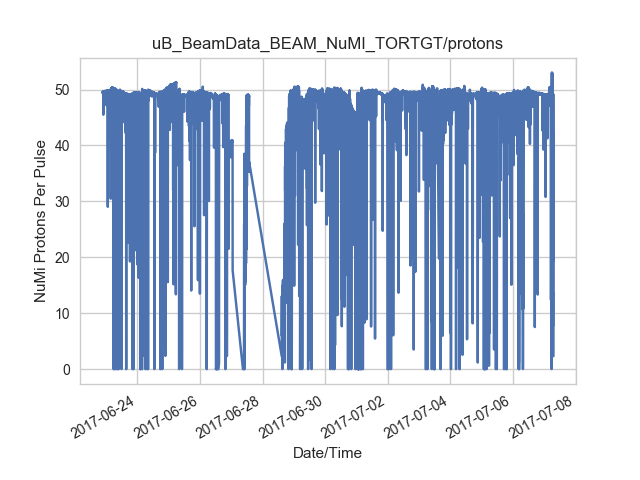

In [11]:
key = 'uB_BeamData_BEAM_NuMI_TORTGT/protons'
ax = plt.figure()
plt.plot(results[key]['time'],results[key]['value'])
plt.xlabel('Date/Time')
plt.ylabel('NuMi Protons Per Pulse')
plt.title(key)
ax.autofmt_xdate()

<IPython.core.display.Javascript object>


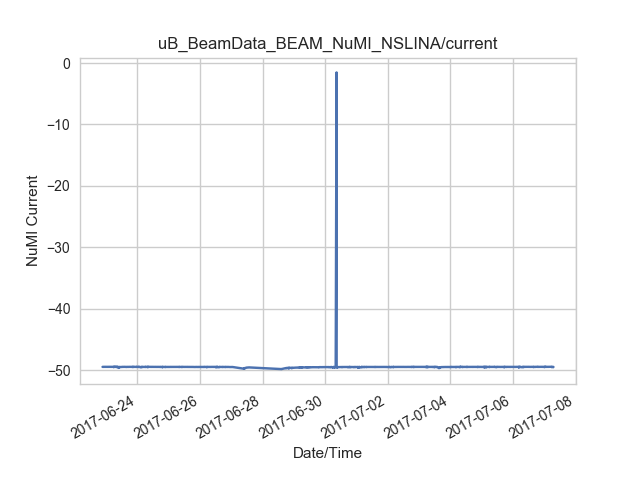

In [12]:
key = 'uB_BeamData_BEAM_NuMI_NSLINA/current'
ax = plt.figure()
plt.plot(results[key]['time'],results[key]['value'])
plt.xlabel('Date/Time')
plt.ylabel('NuMI Current')
plt.title(key)
ax.autofmt_xdate()

<IPython.core.display.Javascript object>


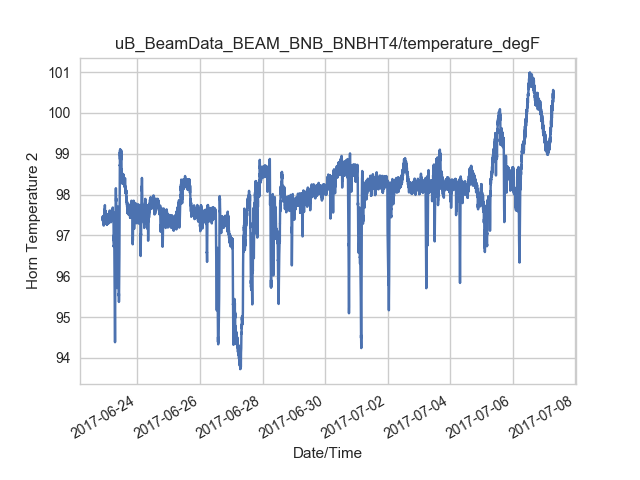

In [13]:
key = 'uB_BeamData_BEAM_BNB_BNBHT4/temperature_degF'
ax = plt.figure()
plt.plot(results[key]['time'],results[key]['value'])
plt.xlabel('Date/Time')
plt.ylabel('Horn Temperature 2')
plt.title(key)
df = ax.autofmt_xdate()

<IPython.core.display.Javascript object>


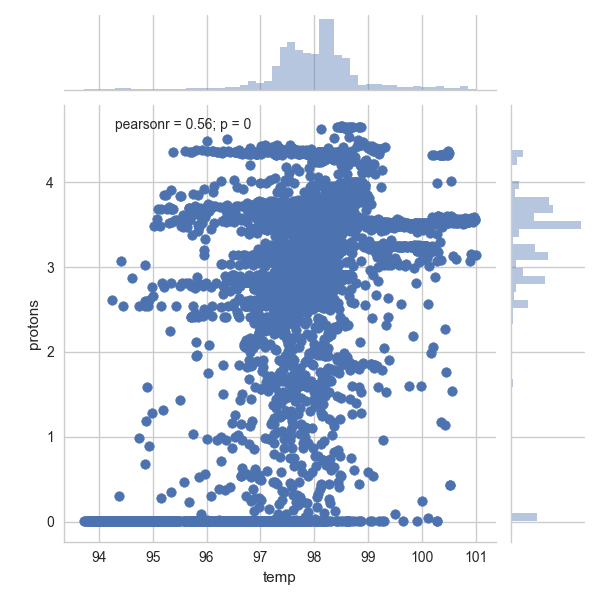

In [14]:
correlation_results={'temp':[],'protons':[]}
X = zip(results['uB_BeamData_BEAM_BNB_TOR875/protons']['time'], results['uB_BeamData_BEAM_BNB_TOR875/protons']['value'])
Y = zip(results['uB_BeamData_BEAM_BNB_BNBHT4/temperature_degF']['time'], results['uB_BeamData_BEAM_BNB_BNBHT4/temperature_degF']['value'])

for x in X:
    y = min(Y, key=lambda i:abs(i[0]-x[0])  )
    correlation_results['temp'].append(y[1])
    correlation_results['protons'].append(x[1])

df = pandas.DataFrame(correlation_results,
                     columns=['temp', 'protons'])
sns.jointplot(x='temp',y='protons', data=df)